Whilst it would be nicer to plot the visualisations using `bokeh` as there is interactivity, the Jupyter Book format does not enable the use of `bokeh` at this current point in time, thus we will use `matplotlib` and `seaborn` to create static plots.

Note, we have created a helper function which also includes relative-positioning of the 'title-box'. This was inspired by the `matplotlib` [documentation](https://matplotlib.org/3.1.1/tutorials/text/text_props.html).

In [75]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

# create helper function that places text box inside a plot
## so acts like an 'in-plot title'
def add_titlebox(ax, text):
    # build a rectangle in axes coordinates - should parameterise these as arguments
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    
    ax.text(x = right, y = top, s = text,
            horizontalalignment = 'right', verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = dict(facecolor = 'white', alpha = 0.6),
            fontsize = 12.5)
    return ax

In [65]:
# pass in variable from other notebook
%store -r data_proportion

# wrangle
## un-groupby so we get previous grouped index as columns
data_proportion = data_proportion.reset_index()
## set `region` to be categorical
data_proportion['region'] = data_proportion['region'].astype('category')

data_proportion.info()
data_proportion['region'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   arrival_date       2715 non-null   datetime64[ns]
 1   region             2715 non-null   category      
 2   proportion_guests  2715 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 45.4 KB


[Americas, Europe, Asia, Oceania, Africa]
Categories (5, object): [Americas, Europe, Asia, Oceania, Africa]

Below, we plot the data now taking an [object-orientated approach](https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0).

Note, we have split our data out into three overarching groups by region:
1. Europe - this has the highest proportion of guests booking hotels
1. Asia and Americas - these `regions` have similar levels of guests booking hotels
1. Africa and Oceania - these `regions` have similar levels of guests booking hotels

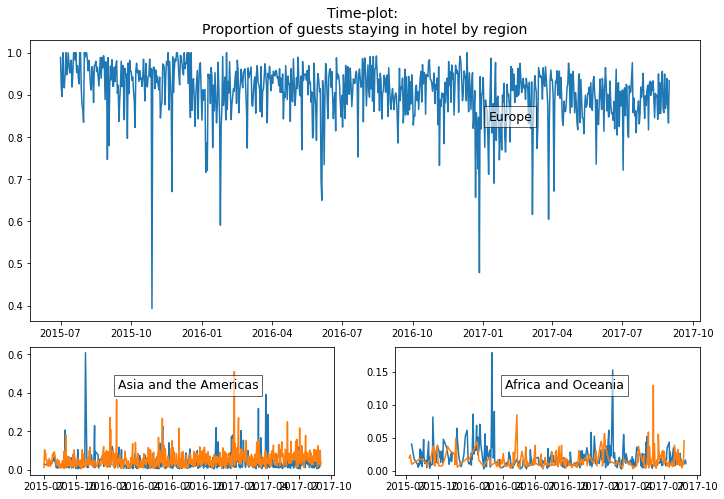

In [83]:
# take object-orientated approach to plotting

# set plotting grid
gridsize = (3,2)
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot2grid(shape = gridsize, loc = (0, 0), colspan = 2, rowspan = 2)
ax2 = plt.subplot2grid(shape = gridsize, loc = (2, 0))
ax3 = plt.subplot2grid(shape = gridsize, loc = (2, 1))

ax1.set_title(label = 'Time-plot: \nProportion of guests staying in hotels by region',
             fontdict = {'fontsize': 14})
ax1.plot('arrival_date', 'proportion_guests', data = data_europe)
add_titlebox(ax = ax1, text = 'Europe')
ax2.plot('arrival_date', 'proportion_guests', data = data_proportion.query('region == "Asia"'))
ax2.plot('arrival_date', 'proportion_guests', data = data_proportion.query('region == "Americas"'))
add_titlebox(ax = ax2, text = 'Asia and the Americas')
ax3.plot('arrival_date', 'proportion_guests', data = data_proportion.query('region == "Africa"'))
ax3.plot('arrival_date', 'proportion_guests', data = data_proportion.query('region == "Oceania"'))
add_titlebox(ax = ax3, text = 'Africa and Oceania')

The *Asia*, *Americas*, *Africa* and *Oceania* plots above are quite small in comparison to the *Europe* one. If you wish to explore them in further detail, you can click the *'+'* icon below to reveal the plots and code that generates them.

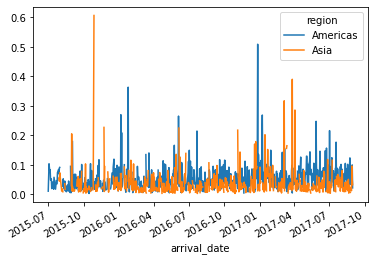

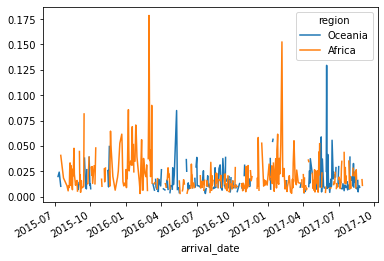

In [84]:
# focus on Asia, Americas, Africa and Oceania more
data_asiaamericas = data_proportion.query('region in ("Asia", "Americas")')
data_asiaamericas.pivot(index = 'arrival_date', columns = 'region', values = 'proportion_guests').plot()

data_africaoceania = data_proportion.query('region in ("Africa", "Oceania")')
data_africaoceania.pivot(index = 'arrival_date', columns = 'region', values = 'proportion_guests').plot()

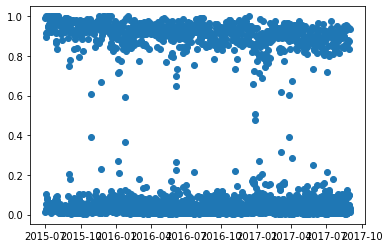

In [6]:
plt.scatter(data_proportion['arrival_date'], data_proportion['proportion_guests'])